In [ ]:
import pandas as pd
df = pd.read_csv('credit_card_fraud.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.iloc[390]

step                        1
type                  CASH_IN
amount              228451.89
nameOrig          C1614133563
oldbalanceOrg       143236.26
newbalanceOrig      371688.15
nameDest          C2083562754
oldbalanceDest      719678.38
newbalanceDest     1186556.81
isFraud                     0
isFlaggedFraud              0
Name: 390, dtype: object

In [ ]:
# how many cases are fraudulent in our data?
df['isFraud'].value_counts()
# df.loc[df['isFraud'] == 1]

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
8213/6354407

0.0012924888191769902

In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


# Business Questions:
* What makes a transaction fradulent?
* What are the most common cases of fraud?
* Are there specific customers/agents responsible for fraudulent transactions?
*


Hypotheses/Findings:

* amount of transaction > 1 million - it's fraud
* if the type is cash out and name_orig/dest is different - fraud
* is whole amount is used - fraud
* transfer and cash_out in same step with the same amount - fraud
* fraud occurs on customer accounts not merchant accounts

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# check nulls
df[df.isnull().any(axis=1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


<Axes: >

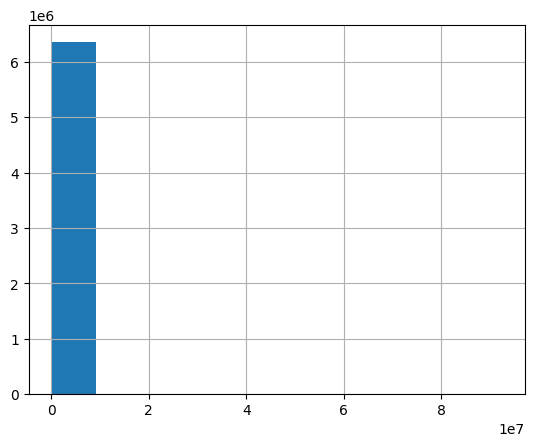

In [ ]:
# check histograms
df['amount'].hist()

<Axes: >

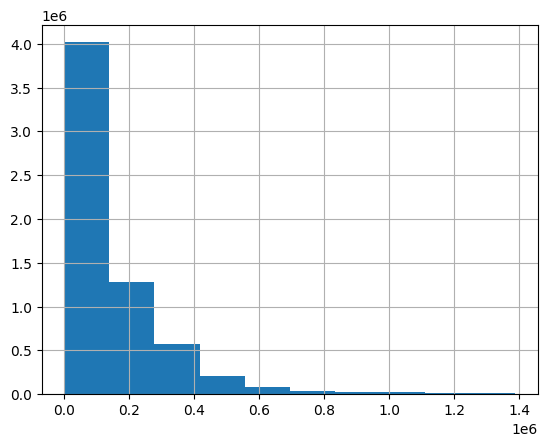

In [ ]:
df.loc[df['amount'] < df['amount'].mean() + df['amount'].std()*2, 'amount'].hist()

In [ ]:
# which transactions type are fraudulent?
df.loc[(df['isFraud'] == 1) & (df['type'] == 'DEBIT')]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
df.loc[(df['isFraud'] == 1) & (df['type'] == 'CASH_IN')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:

df.loc[(df['isFraud'] == 1) & (df['type'] == 'CASH_OUT')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


In [ ]:

df.loc[(df['isFraud'] == 1) & (df['type'] == 'TRANSFER')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,0


In [ ]:

df.loc[(df['isFraud'] == 1) & (df['type'] == 'PAYMENT')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
# cash_out and transfer are the two fraudulent data types

In [ ]:
# look at the fradulent transactions

In [ ]:
df.loc[(df['isFraud'] == 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [ ]:
# how to consider transaction ranges
# raw values
#
# df.loc[df['amount'] < df['amount'].mean() + df['amount'].std()*2, 'amount'].hist()

In [ ]:
df['amount'].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

In [ ]:
# have a column for amounts less than mean and amounts greater than mean

mean = df['amount'].mean()
df['amount_less_than_mean'] = df['amount'].apply(lambda x: 1 if x < mean else 0)
df['amount_greater_than_mean'] = df['amount'].apply(lambda x: 1 if x > mean else 0)

In [ ]:
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_less_than_mean,amount_greater_than_mean
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,0


In [ ]:
# add a column to detect if the origin transaction was a customer or a merchant
df['origIsCustomer'] = df['nameOrig'].apply(lambda x: 1 if x.startswith('C') else 0)
df['origIsMerchant'] = df['nameOrig'].apply(lambda x: 1 if x.startswith('M') else 0)
df['destIsCustomer'] = df['nameDest'].apply(lambda x: 1 if x.startswith('C') else 0)
df['destIsMerchant'] = df['nameDest'].apply(lambda x: 1 if x.startswith('M') else 0)

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_less_than_mean,amount_greater_than_mean,origIsCustomer,origIsMerchant,destIsCustomer,destIsMerchant
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,0,1,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,0,1,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,0,1,0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,1,0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,0,1,0,0,1


In [ ]:
# onehot encode types
one_hot_encoded = pd.get_dummies(df['type'])
df = pd.concat([df, one_hot_encoded], axis=1)

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,amount_greater_than_mean,origIsCustomer,origIsMerchant,destIsCustomer,destIsMerchant,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,...,0,1,0,0,1,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,...,0,1,0,0,1,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,...,0,1,0,1,0,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,...,0,1,0,1,0,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,...,0,1,0,0,1,0,0,0,1,0


In [ ]:
len(df[df['isFlaggedFraud']==1])

16

In [ ]:
len(df[df['isFraud']==1])

8213

In [ ]:
fraudulent_users = df[df['isFraud'] == 1]['nameOrig'].unique()
non_fraudulent_df = df[df['isFraud'] == 0]
users_in_non_fraud = non_fraudulent_df[non_fraudulent_df['nameOrig'].isin(fraudulent_users)]
print("Users involved in both fraudulent and non-fraudulent transactions:")
print(users_in_non_fraud['nameOrig'].unique())

Users involved in both fraudulent and non-fraudulent transactions:
['C1498185758' 'C803411135' 'C1044518032' 'C1885333477' 'C1882162040'
 'C1191696703' 'C1127304441' 'C171834973' 'C876181265' 'C471097879'
 'C483009518' 'C2004363483' 'C1015856166' 'C357911107' 'C850961884'
 'C1851065642' 'C812001868' 'C1899367925' 'C570470570' 'C686187434'
 'C929585215' 'C10982843' 'C1118399210' 'C1863683348' 'C431038121'
 'C1627918307' 'C635739031' 'C432562518']


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,amount_greater_than_mean,origIsCustomer,origIsMerchant,destIsCustomer,destIsMerchant,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,...,1,1,0,1,0,0,1,0,0,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,...,1,1,0,1,0,0,0,0,0,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,...,1,1,0,1,0,0,1,0,0,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,...,1,1,0,1,0,0,0,0,0,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,...,1,1,0,1,0,0,1,0,0,0


In [ ]:
df[df['step']==743]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,amount_greater_than_mean,origIsCustomer,origIsMerchant,destIsCustomer,destIsMerchant,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,...,1,1,0,1,0,0,0,0,0,1
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,...,1,1,0,1,0,0,1,0,0,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,...,1,1,0,1,0,0,0,0,0,1
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,...,1,1,0,1,0,0,1,0,0,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,...,1,1,0,1,0,0,0,0,0,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,...,1,1,0,1,0,0,1,0,0,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,...,1,1,0,1,0,0,0,0,0,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,...,1,1,0,1,0,0,1,0,0,0


<Axes: >

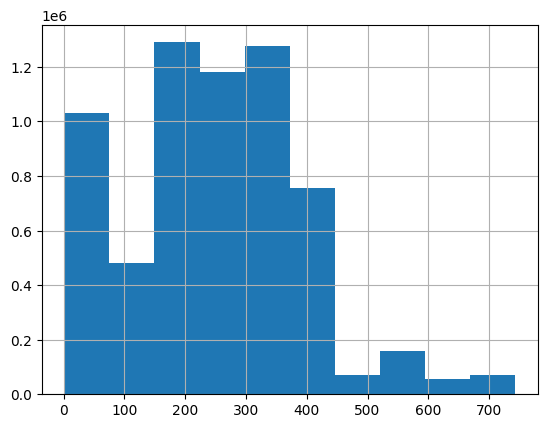

In [ ]:
df['step'].hist()

<Axes: >

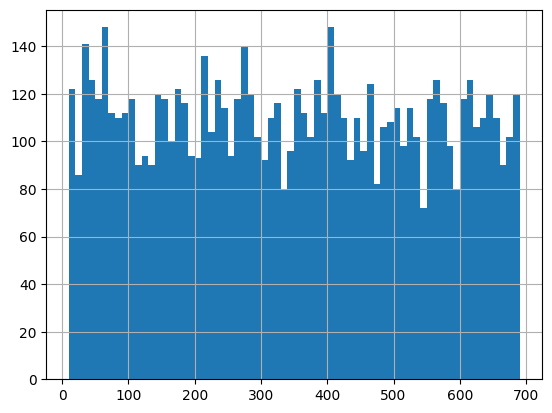

In [ ]:
df[df['isFraud'] == 1]['step'].hist(bins=[10 * i for i in range(1, 70)])

<Axes: >

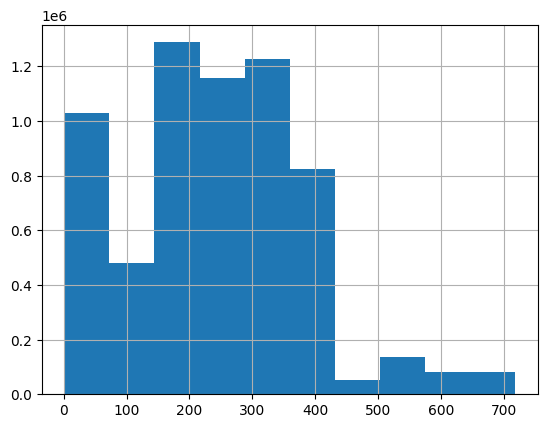

In [ ]:
df[df['isFraud'] == 0]['step'].hist()

In [ ]:
# add a new column if a customer has a fraudulent transaction and at least 2 transactions in that step
df['hasAFraudulentTransaction'] = df.apply(lambda x: 1 if x['isFraud'] == 1 and x['step'] > 1 else 0, axis=1)



In [ ]:
df['TransferAndCashOutSameStep'] = 0

transfer_mask = df['type'] == 'TRANSFER'
cash_out_mask = df['type'] == 'CASH_OUT'
matching_cash_out_indices = (
    transfer_mask &
    cash_out_mask.shift(-1) &
    (df['step'] == df['step'].shift(-1)) &
    (df['amount'] == df['amount'].shift(-1))
)

matching_transfer_indices = (
    cash_out_mask &
    transfer_mask.shift(1) &
    (df['step'] == df['step'].shift(1)) &
    (df['amount'] == df['amount'].shift(1))
)

# Update the 'TransferAndCashOutSameStep' column
df.loc[matching_cash_out_indices, 'TransferAndCashOutSameStep'] = 1
df.loc[matching_transfer_indices, 'TransferAndCashOutSameStep'] = 1


In [ ]:
matching_cash_out_indices

0          False
1          False
2           True
3          False
4          False
           ...  
6362615    False
6362616     True
6362617    False
6362618     True
6362619    False
Length: 6362620, dtype: bool

In [ ]:
matching_transfer_indices

0          False
1          False
2          False
3           True
4          False
           ...  
6362615     True
6362616    False
6362617     True
6362618    False
6362619     True
Length: 6362620, dtype: bool

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,origIsMerchant,destIsCustomer,destIsMerchant,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,hasAFraudulentTransaction,TransferAndCashOutSameStep
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,...,0,1,0,0,0,0,0,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,...,0,1,0,0,1,0,0,0,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
df = df.drop(["type", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFlaggedFraud"], axis=1)

In [ ]:
df.head()

,step,amount,nameOrig,nameDest,isFraud,amount_less_than_mean,amount_greater_than_mean,origIsCustomer,origIsMerchant,destIsCustomer,destIsMerchant,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,hasAFraudulentTransaction,TransferAndCashOutSameStep
0,1,9839.64,C1231006815,M1979787155,0,1,0,1,0,0,1,0,0,0,1,0,0,0
1,1,1864.28,C1666544295,M2044282225,0,1,0,1,0,0,1,0,0,0,1,0,0,0
2,1,181.00,C1305486145,C553264065,1,1,0,1,0,1,0,0,0,0,0,1,0,1
3,1,181.00,C840083671,C38997010,1,1,0,1,0,1,0,0,1,0,0,0,0,1
4,1,11668.14,C2048537720,M1230701703,0,1,0,1,0,0,1,0,0,0,1,0,0,0


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
independent_variables = ['step', 'amount', 'amount_greater_than_mean', 'destIsCustomer', 'TransferAndCashOutSameStep'] # CASH_OUT', 'TRANSFER hasAFraudulentTransaction, 'TransferAndCashOutSameStep']

In [ ]:
X = df[independent_variables]
y = df['isFraud'].values

In [ ]:
# split data 80-20 for train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Calculate confusion matrix for the model
y_pred = model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[1270895,       9],
       [      7,    1613]])

In [ ]:
# Accuracy, precision, and recall are calculated from values in the confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

accuracy = (TP + TN) / (TP + FN + FP + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
if precision + recall == 0:
  print("precision + recall is 0")
f1 = 2 * (precision * recall) / (precision + recall)
print(accuracy, precision, recall, f1)

0.9999874265632711 0.9944512946979038 0.995679012345679 0.9950647748303516
